# Alzheimer detection with MRI ( Magnetic resonance imaging )

![](../resources/alzheimer-enfermedad.png) 

## What is Alzheimer? 

Alzheimer's disease is the most common type of dementia. It is a progressive disease beginning with mild memory loss and possibly leading to loss of the ability to carry on a conversation and respond to the environment. Alzheimer's disease involves parts of the brain that control thought, memory, and language.

## What are the warning signs of Alzheimer’s disease?

Alzheimer’s disease is not a normal part of aging. Memory problems are typically one of the first warning signs of Alzheimer’s disease and related dementias.

In addition to memory problems, someone with symptoms of Alzheimer’s disease may experience one or more of the following:

- Memory loss that disrupts daily life, such as getting lost in a familiar place or repeating questions.
- Trouble handling money and paying bills.
- Difficulty completing familiar tasks at home, at work or at leisure.
- Decreased or poor judgment.
- Misplacing things and being unable to retrace steps to find them.
- Changes in mood, personality, or behavior.


## Alezheimer´s stages

There are five stages associated with Alzheimer's disease: preclinical Alzheimer's disease, mild cognitive impairment due to Alzheimer's disease, mild dementia due to Alzheimer's disease, moderate dementia due to Alzheimer's disease and severe dementia due to Alzheimer's disease.

If you want to learn more about Alzheimer, check this website --> 'https://www.alz.org/alzheimer_s_dementia'

# DEFINITION OF THE PROJECT


## Alzheimer´s Dataset

The dataset is organized into 2 folders (train, test) and contains subfolders for each image category (NonDemented/ VeryMildDemented/ MildDemented/ ModerateDemented). There are 5120 images(2.291 NonDemented, 1794 VeryMildDemented, 788 MildDemented, 247 ModerateDemented) in the train set and 1279 images in the test set. 

Source of the Dataset --> 'https://www.kaggle.com/tourist55/alzheimers-dataset-4-class-of-images'

## Goal of the project

This project tries to predict the stage of Alzheimer´s desease working on MRI images. 

For this aim, we are going to use different models of Machine Learning and Deep Learning, such as Logist Regression, Random Forest, CNN... 

### ML MODELS

### 1. FIRST MODEL : CNN


#### What is CNN?

In deep learning, a convolutional neural network (CNN/ConvNet) is a class of deep neural networks, most commonly applied to analyze visual imagery. Now when we think of a neural network we think about matrix multiplications but that is not the case with ConvNet. It uses a special technique called Convolution. Now in mathematics convolution is a mathematical operation on two functions that produces a third function that expresses how the shape of one is modified by the other.

#### In our model:

A CNN composed of multiple layers of artificial neurons:

- 2 Convolutional layers, 1 with 128 neurons and other with 64.
- 2 MAxPooling2D layers: reduces the dimension
- 2 Dropout of 0.5
- 1 Flatten layer
- 3 Dense layer: 128 neurons, 64 neurons - output: 4 neurons (4 classes)

Max score : 0.4315 (cnn7.h5)

### 2. SECOND MODEL : PRETRAINED NETWORK : VGG16

#### What is VGG16 pretrained network?

VGG16 is a convolutional neural network model proposed by K. Simonyan and A. Zisserman from the University of Oxford in the paper “Very Deep Convolutional Networks for Large-Scale Image Recognition”.

#### In our model:

A CNN composed of multiple layers of artificial neurons:

- 1 Dropout of 0.5
- 1 Flatten layer
- 2 Dense layer: 512 neurons - output: 4 neurons (4 classes)

Max score : 0.5356 (vgg16_1.h5)

### 3. THIRD MODEL : PRETRAINED NETWORK : ResNet50V2

ResNet-50 is a convolutional neural network that is 50 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database.

#### In our model:

A CNN composed of multiple layers of artificial neurons:

- 1 Dropout of 0.25
- 1 Flatten layer
- 2 Dense layer: 128 neurons - output: 4 neurons (4 classes)

Max score : 0.4564 (resnetResNet05v2.h5)

### 4. FOURTH MODEL : PRETRAINED NETWORK : ResNet152V2

ResNet-50 is a convolutional neural network that is 152 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database.

#### In our model:

A CNN composed of multiple layers of artificial neurons:

- 1 Dropout of 0.25
- 1 Flatten layer
- 2 Dense layer: 128 neurons - output: 4 neurons (4 classes)

Max score : 0.4564 (resnetResNet05v2.h5)

### 5. FIFTH MODEL : PRETRAINED NETWORK : ResNet152V2

Inception v3 is a convolutional neural network for assisting in image analysis and object detection, and got its start as a module for Googlenet. It is the third edition of Google's Inception Convolutional Neural Network, originally introduced during the ImageNet Recognition Challenge.

#### In our model:

A CNN composed of multiple layers of artificial neurons:

- 1 Dropout of 0.25
- 1 Flatten layer
- 2 Dense layer: 256 neurons - output: 4 neurons (4 classes)

Max score : 0.4564 (InceptionV3.h5)

# --> CODE 

## -------------    Import the necessary libraries      --------------

In [1]:
# Files and directories

import os
from os import listdir
from os.path import isfile, join

# Json

import json

# DataFrame and Visualization 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Process images

import imageio
import cv2

# Machine learning

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import pickle

# Deep Learning

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback  
from tensorflow.keras.preprocessing.image import ImageDataGenerator ,img_to_array
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet_v2 import ResNet152V2
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Imports from .py files

sys.path.append("../src/utils_")

from utils_.create_df import img_array, concat
from utils_.folders_tb import read_folder, read_data
from utils_.visualization_tb import pie_plot, to_percent, show_train, show_accuracy, show_pred, time
from utils_.models_tb import cnn, vgg16, res_net, svc, random_forest, load, fit, res_net_v2, inception

# from utils_.mining_data_tb import data_generator

In [2]:
path = os.getcwd()
route = os.path.dirname

## -------------     Process the data    --------------

### Create DataFrames from the folders 



In [3]:
# Imported from create_df.py

mild = img_array(0, "train", "MildDemented")
moderate = img_array(1, "train", "ModerateDemented")
non_demented = img_array(2, "train", "NonDemented")
very_mild = img_array(3, "train", "VeryMildDemented")

In [4]:
# Show how many images are there in each folder

len_mild = len(mild)
print("len mild:", len_mild)
len_moderate = len(moderate)
print("len moderate:", len_moderate)
len_non_demented = len(non_demented)
print("len non demented: ", len_non_demented)
len_very_mild = len(very_mild)
print("len very mild: ", len_very_mild)
suma = len_mild + len_moderate + len_non_demented + len_very_mild
print("total:", suma)

len mild: 722
len moderate: 700
len non demented:  2083
len very mild:  1490
total: 4995


### Plot the amount of data in each folder

In [5]:
# Imported from visualization_tb.py

# Convert the amount of images in each folder to percentage 

l1 = to_percent(len_mild)
l2 = to_percent(len_moderate)
l3 = to_percent(len_non_demented)
l4 = to_percent(len_very_mild)

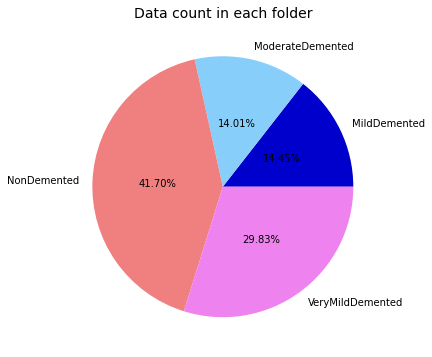

In [6]:
# Imported from visualization_tb.py

# Plot the amount of data in each folder to see the difference

pie_plot(l1, l2, l3, l4, "Data count in each folder")

As the graphic shows, the amount of data in 'NonDemented' and in 'VeryMildDemented' is much higher than data in 'MildDemented' and 'ModerateDemented'

### Data augmentation

1. MODERATE DEMENTED

In [7]:
X_train = np.stack(np.array(moderate["Image"]))
X_train.shape

(700, 180, 180, 3)

In [9]:
# Imported from mining_data_tb.py

# This cell creates new images

# DON´T RUN THIS CELL 

"""data_generator(X_train, "ModerateDemented", len_moderate)"""

'data_generator(X_train, "ModerateDemented", len_moderate)'

2. MILD DEMENTED

In [8]:
X_train = np.stack(np.array(mild["Image"]))
X_train.shape

(722, 180, 180, 3)

In [11]:
# Imported from mining_data_tb.py

# This cell creates new images

# DON´T RUN THIS CELL

"""data_generator(X_train, "MildDemented", len_mild)"""

'data_generator(X_train, "MildDemented", len_mild)'

3. VERY MILD DEMENTED

In [9]:
X_train = np.stack(np.array(very_mild["Image"]))
X_train.shape

(1490, 180, 180, 3)

In [13]:
# Imported from mining_data_tb.py

# This cell creates new images

# DON´T RUN THIS CELL

"""data_generator(X_train, "VeryMildDemented", len_very_mild)"""

'data_generator(X_train, "VeryMildDemented", len_very_mild)'

4. NON DEMENTED

In [10]:
X_train = np.stack(np.array(non_demented["Image"]))
X_train.shape

(2083, 180, 180, 3)

In [15]:
# Imported from mining_data_tb.py

# This cell creates new images

# DON´T RUN THIS CELL

"""data_generator(X_train, "NonDemented", len_non_demented)"""

'data_generator(X_train, "NonDemented", len_non_demented)'

## -------------    Create DataFrames from the new folders      --------------

This is going to be used in:  Some Machine Learning Models, Data augmentation, Flask, Streamlit, SQL...

In [6]:
# Imported from create_df.py

# Create a Df for each folder

mild = img_array(0, "new_train", "MildDemented")
moderate = img_array(1, "new_train", "ModerateDemented")
non_demented = img_array(2, "new_train", "NonDemented")
very_mild = img_array(3, "new_train", "VeryMildDemented")

### - Repeat the process as we did it before to analize the size of data in each folder

In [8]:
# Show how many images are there in each folder

len_mild = len(mild)
print("len mild:", len_mild)
len_moderate = len(moderate)
print("len moderate:", len_moderate)
len_non_demented = len(non_demented)
print("len non demented: ", len_non_demented)
len_very_mild = len(very_mild)
print("len very mild: ", len_very_mild)
suma = len_mild + len_moderate + len_non_demented + len_very_mild
print("total:", suma)

len mild: 722
len moderate: 700
len non demented:  2083
len very mild:  1490
total: 4995


In [9]:
# Import from visualization_tb.py

# Convert the amount of images in each folder to percentage 

l1 = to_percent(len_mild)
l2 = to_percent(len_moderate)
l3 = to_percent(len_non_demented)
l4 = to_percent(len_very_mild)

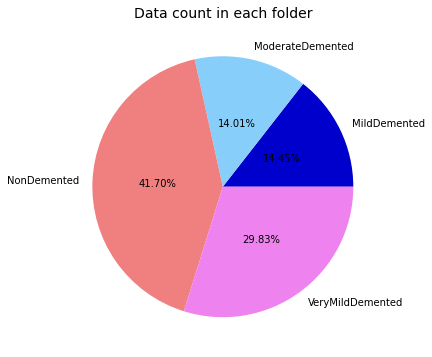

In [10]:
# Imported from visualization_tb.py

# Plot the amount of data in each folder to see the difference

pie_plot(l1, l2, l3, l4, "Data count in each folder")

- Now the amount of data in each folder is more or less equal

In [11]:
# Imported from mining_data_tb.py

# Concat all the Dataframes in one

df = concat(mild, moderate, non_demented, very_mild)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4995 entries, 0 to 1489
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Image     4995 non-null   object
 1   Label     4995 non-null   int64 
 2   Fullpath  4995 non-null   object
 3   Folder    4995 non-null   object
 4   Size      4995 non-null   object
dtypes: int64(1), object(4)
memory usage: 234.1+ KB


In [56]:
# Save as csv --> easier to work

df.to_csv("../resources/dataframe.csv", index=False)

## -------------     Read folders      --------------

Read images from the folders. The label is the folder`s name 

Class names: ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [12]:
# Imported from folders_tb.py

# Separate in train and val set

train_ds = read_folder("training", "new_train")
val_ds = read_folder("validation", "new_train")

Found 8280 files belonging to 4 classes.
Using 6624 files for training.
['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
Found 8280 files belonging to 4 classes.
Using 1656 files for validation.
['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


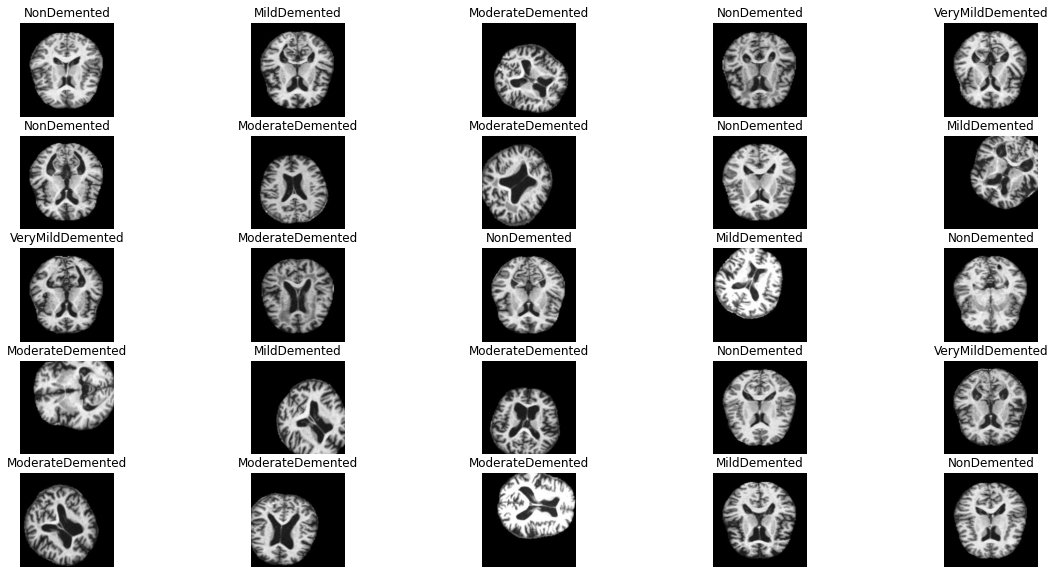

In [13]:
# Imported from visualization_tb.py

# Show some of the images with their labels contained in the train set

show_train(train_ds)

# MACHINE LEARNING MODELS

## 1. CNN (Convolutional Neural Network)

1) Define the model

In [58]:
# Imported from models_tb.py 

model = cnn("accuracy")

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 178, 178, 128)     3584      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 89, 89, 128)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 89, 89, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 89, 89, 64)        73792     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 45, 45, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 45, 45, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 129600)           

2) Train the model

In [59]:
# Imported from models_tb.py 

# DON´ T RUN THIS CELL

history = fit(model, train_ds, val_ds, 10)

Epoch 1/10
207/207 [==============================] - 499s 2s/step - loss: 78.5042 - accuracy: 0.4491 - val_loss: 1943.5227 - val_accuracy: 0.2355
Epoch 2/10
207/207 [==============================] - 484s 2s/step - loss: 4.6519 - accuracy: 0.5590 - val_loss: 1274.4789 - val_accuracy: 0.2494
Epoch 3/10
207/207 [==============================] - 532s 3s/step - loss: 2.1064 - accuracy: 0.6339 - val_loss: 821.5510 - val_accuracy: 0.2319
Epoch 4/10
207/207 [==============================] - 504s 2s/step - loss: 1.4534 - accuracy: 0.6925 - val_loss: 673.5685 - val_accuracy: 0.2772
Epoch 5/10
207/207 [==============================] - 451s 2s/step - loss: 1.0661 - accuracy: 0.7458 - val_loss: 301.7551 - val_accuracy: 0.2524
Epoch 6/10
207/207 [==============================] - 459s 2s/step - loss: 0.9582 - accuracy: 0.7637 - val_loss: 472.6670 - val_accuracy: 0.2271
Epoch 7/10
207/207 [==============================] - 515s 2s/step - loss: 1.1113 - accuracy: 0.7624 - val_loss: 363.1501 - val

- Plot the accuracy and the val_loss

In [ ]:
# Imported from visualization_tb.py 

show_accuracy(1, 2, ["accuracy", "loss"], history)

NameError: name 'history' is not defined

3) Save the model


In [ ]:
model.save("../models/cnn8.h5")

4. Read the folders in test one by one

- VeryMildDemented

In [20]:
# Import from folders_tb.py

# We are showing one of the folders of our test set

ruta = route(path) + os.sep + "data" + os.sep + "test" + os.sep + "VeryMildDemented"

x_test = read_data(ruta)

# Process the images as the model requires
x_test = preprocess_input(x_test)
print(x_test.shape)

(448, 180, 180, 3)


5. Load the saved model

In [26]:
new_model = load("../models/cnn7.h5")

6. Predict the new model

In [27]:
preds = new_model.predict(x_test)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

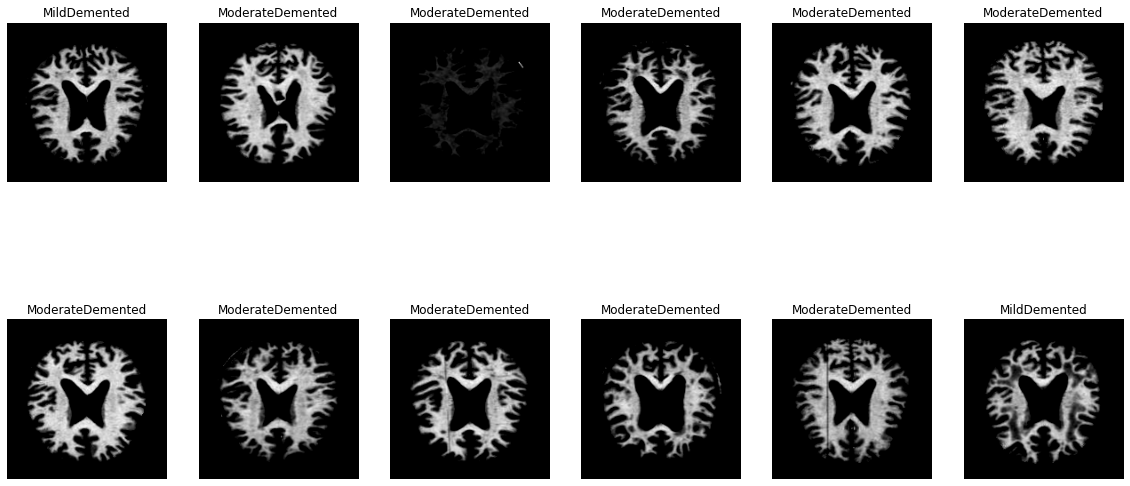

In [28]:
# Imported from visualization_tb.py 

# The images are the x_test set and the tittle of each image the prediction

show_pred(12, 2, 6, x_test, train_ds, preds)

7. Score the model 

In [29]:
# Import from folders_tc.py

test_ds = read_folder("training", "test", batch_size=32)

Found 1404 files belonging to 4 classes.
Using 1124 files for training.
['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [30]:
# Score our model with the test set

evaluate = new_model.evaluate(test_ds)

36/36 [==============================] - 10s 262ms/step - loss: 10.1984 - accuracy: 0.4315


Model --> cnn7.h5 --> accuracy: 0.4315

## 2. With pretrained network: VGG16

1. Define the model

In [40]:
# Imported from models_tb

model = vgg16("acc")
model

2) Train the model

In [41]:
# DON´T RUN THIS CELL (5 hours)

# Imported from models_tb

vvgghist = fit(model, train_ds, val_ds, 30)

Epoch 1/30
207/207 [==============================] - 697s 3s/step - loss: 7.0541 - acc: 0.5125 - val_loss: 0.8389 - val_acc: 0.5839
Epoch 2/30
207/207 [==============================] - 678s 3s/step - loss: 0.9271 - acc: 0.5637 - val_loss: 0.8240 - val_acc: 0.5864
Epoch 3/30
207/207 [==============================] - 687s 3s/step - loss: 0.8753 - acc: 0.5903 - val_loss: 0.7915 - val_acc: 0.5906
Epoch 4/30
207/207 [==============================] - 1937s 9s/step - loss: 0.8626 - acc: 0.5995 - val_loss: 0.8034 - val_acc: 0.6431
Epoch 5/30
207/207 [==============================] - 660s 3s/step - loss: 0.8384 - acc: 0.6055 - val_loss: 0.7927 - val_acc: 0.6395
Epoch 6/30
207/207 [==============================] - 661s 3s/step - loss: 0.8162 - acc: 0.6226 - val_loss: 0.7652 - val_acc: 0.6612
Epoch 7/30
207/207 [==============================] - 728s 4s/step - loss: 0.7937 - acc: 0.6375 - val_loss: 0.7830 - val_acc: 0.6612
Epoch 8/30
207/207 [==============================] - 722s 3s/step -

- Plot the accuracy and the val loss

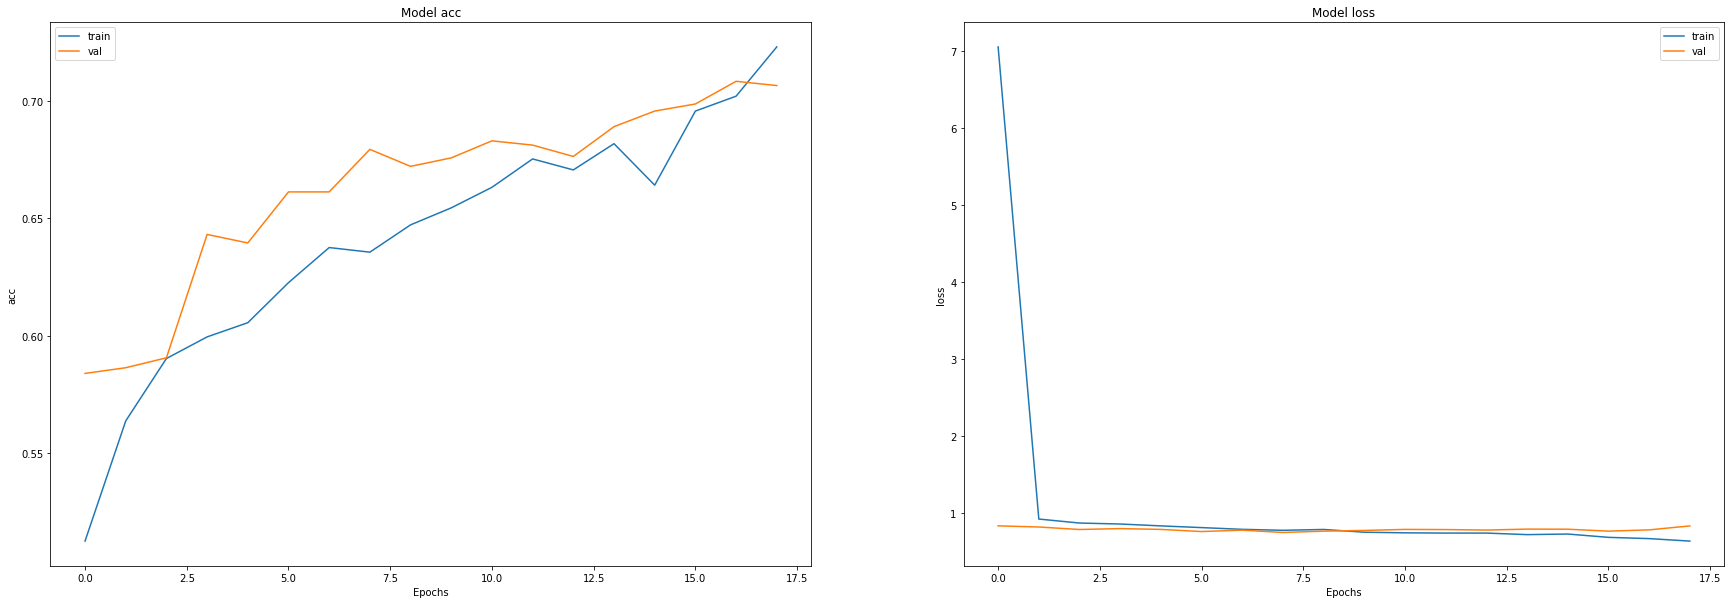

In [44]:
# Imported from models_tb

show_accuracy(1, 2, ["acc", "loss"], vvgghist)

3. Save the model

In [31]:
model.save("../models/vv16_2.h5")

4. Read images from test set folders

5. Load the saved model

In [33]:
# Imported from models_tb

new_model = load("../models/vv16_1.h5")

6. Predict with the model

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

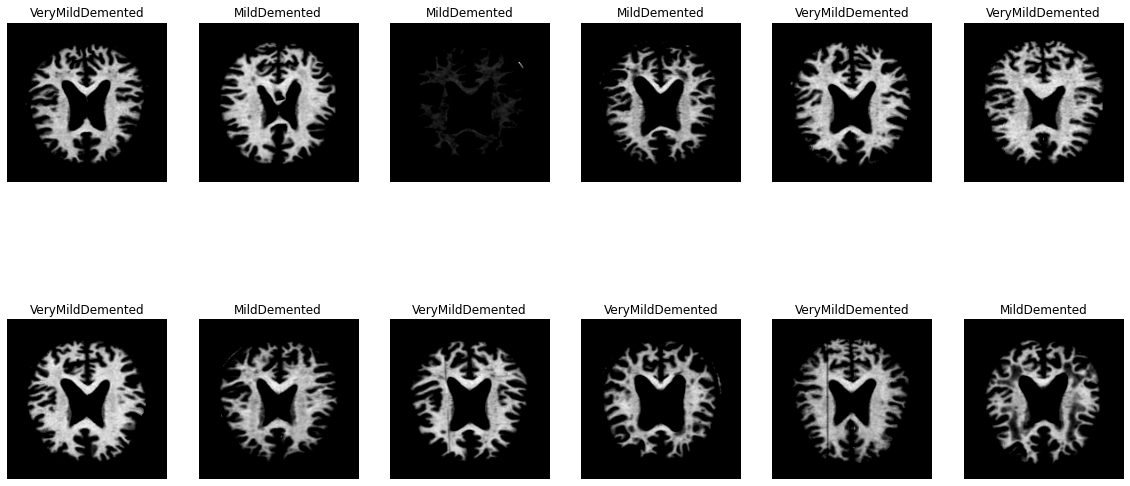

In [34]:
preds = new_model.predict(x_test)

# Imported from visualization_tb.py 

# The images are the x_test set and the tittle of each image the prediction

show_pred(12, 2, 6, x_test, train_ds, preds)

7. Score the model

In [35]:
# Import from folders_tb.py

test_ds = read_folder("training", "test", batch_size=32) 

# Score our model with the test set

evaluate_vgg16 = new_model.evaluate(test_ds)


Found 1404 files belonging to 4 classes.
Using 1124 files for training.
['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
36/36 [==============================] - 102s 3s/step - loss: 0.9984 - acc: 0.5356


## 3. With pretrained network: ResNet50V2

1. Define the model

In [32]:
# Imported from models_tb

model = res_net("acc")

94674944/94668760 [==============================] - 15s 0us/step


2. Fit the model

In [33]:
# Imported from models_tb

reshist = fit(model, train_ds, val_ds, 30)

Epoch 1/30
207/207 [==============================] - 270s 1s/step - loss: 126.7954 - acc: 0.3942 - val_loss: 1.1691 - val_acc: 0.4155
Epoch 2/30
207/207 [==============================] - 263s 1s/step - loss: 1.9199 - acc: 0.4129 - val_loss: 1.1969 - val_acc: 0.4650
Epoch 3/30
207/207 [==============================] - 265s 1s/step - loss: 1.2608 - acc: 0.4135 - val_loss: 1.1114 - val_acc: 0.4209
Epoch 4/30
207/207 [==============================] - 267s 1s/step - loss: 1.2134 - acc: 0.3946 - val_loss: 1.1187 - val_acc: 0.4553
Epoch 5/30
207/207 [==============================] - 269s 1s/step - loss: 1.1934 - acc: 0.4072 - val_loss: 1.0607 - val_acc: 0.4553
Epoch 6/30
207/207 [==============================] - 272s 1s/step - loss: 1.1748 - acc: 0.4146 - val_loss: 1.0509 - val_acc: 0.4795
Epoch 7/30
207/207 [==============================] - 268s 1s/step - loss: 1.1797 - acc: 0.4084 - val_loss: 1.1457 - val_acc: 0.4487
Epoch 8/30
207/207 [==============================] - 275s 1s/step 

- Plot the accuracy and the val loss

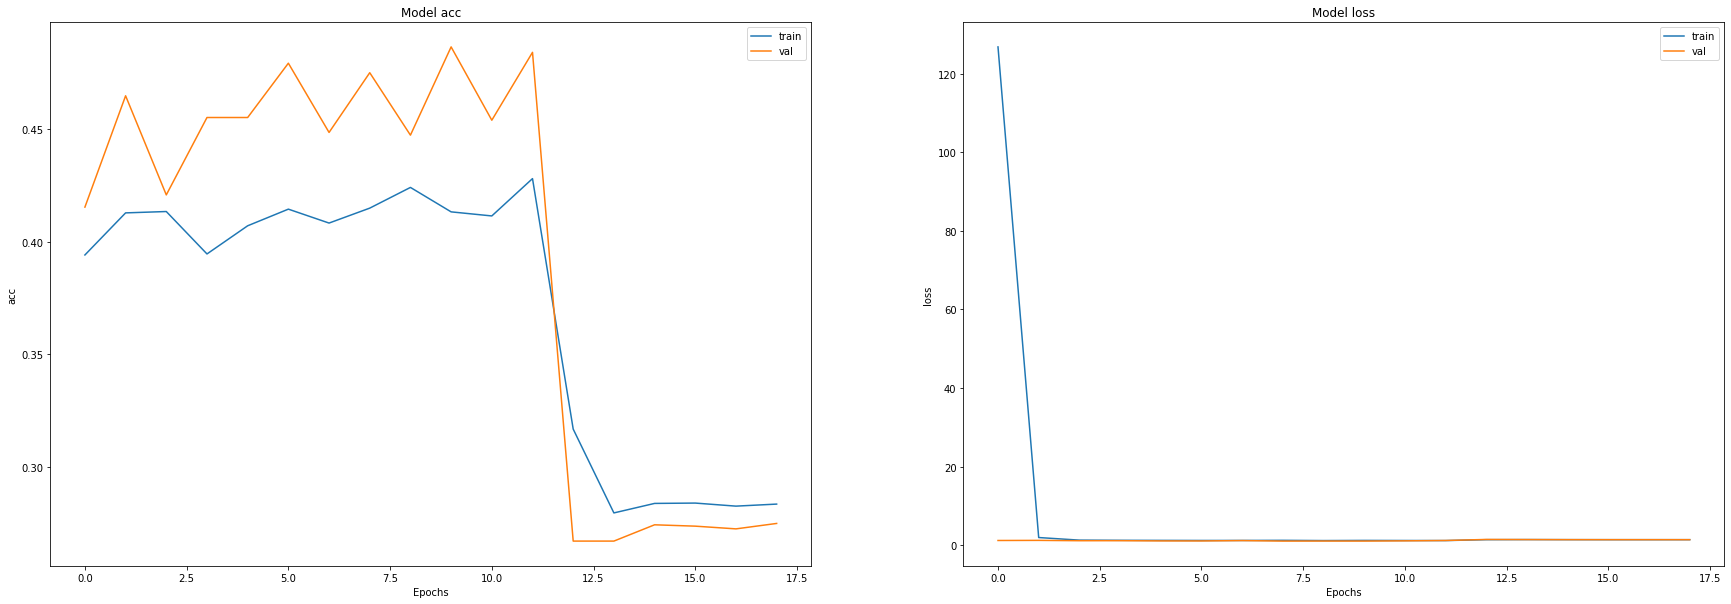

In [36]:
# Imported from models_tb

show_accuracy(1, 2, ["acc", "loss"], reshist)

3. Save the model

In [34]:
model.save("../models/ResNet05v2.h5")


C:\Users\xyang\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


4. Load the saved model

In [36]:
# Imported from models_tb

new_model = load("../models/ResNet05v2.h5")

5. Predict

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

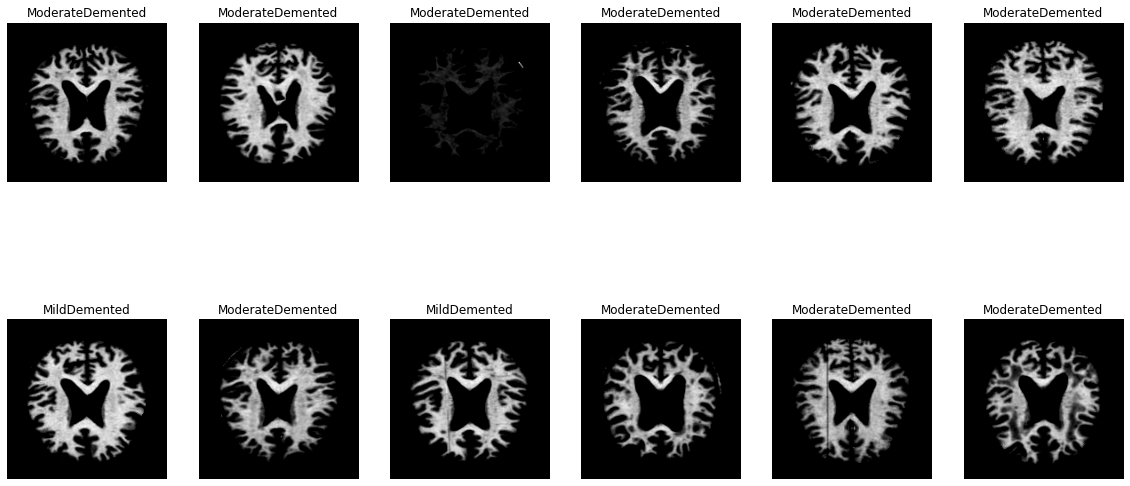

In [37]:
preds = new_model.predict(x_test)

# Imported from visualization_tb.py 

# The images are the x_test set and the tittle of each image the prediction

show_pred(12, 2, 6, x_test, train_ds, preds)

6. Evaluate the model

In [38]:
# Import from folders_tb.py

test_ds = read_folder("training", "test", batch_size=32) 

# Score our model with the test set

evaluate_resnet = new_model.evaluate(test_ds)

Found 1404 files belonging to 4 classes.
Using 1124 files for training.
['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
36/36 [==============================] - 40s 1s/step - loss: 1.3446 - acc: 0.4564


## 4. With Pretrained Network: ResNet152V2

1. Define the model

In [6]:
# Imported from models_tb

model = res_net_v2("acc")

234553344/234545216 [==============================] - 36s 0us/step


2. Fit the model

In [7]:
res_hist = fit(model, train_ds, val_ds, 30)

Epoch 1/30
207/207 [==============================] - 838s 4s/step - loss: 229.5831 - acc: 0.2758 - val_loss: 1.4543 - val_acc: 0.2669
Epoch 2/30
207/207 [==============================] - 839s 4s/step - loss: 1.4007 - acc: 0.2740 - val_loss: 1.3834 - val_acc: 0.2669
Epoch 3/30
207/207 [==============================] - 838s 4s/step - loss: 1.3804 - acc: 0.2745 - val_loss: 1.3833 - val_acc: 0.2669
Epoch 4/30
207/207 [==============================] - 838s 4s/step - loss: 1.3800 - acc: 0.2740 - val_loss: 1.3835 - val_acc: 0.2669
Epoch 5/30
207/207 [==============================] - 794s 4s/step - loss: 1.3798 - acc: 0.2746 - val_loss: 1.3836 - val_acc: 0.2669
Epoch 6/30
207/207 [==============================] - 776s 4s/step - loss: 1.3798 - acc: 0.2745 - val_loss: 1.3837 - val_acc: 0.2669
Epoch 7/30
207/207 [==============================] - 782s 4s/step - loss: 1.3798 - acc: 0.2736 - val_loss: 1.3838 - val_acc: 0.2669
Epoch 8/30
207/207 [==============================] - 762s 4s/step 

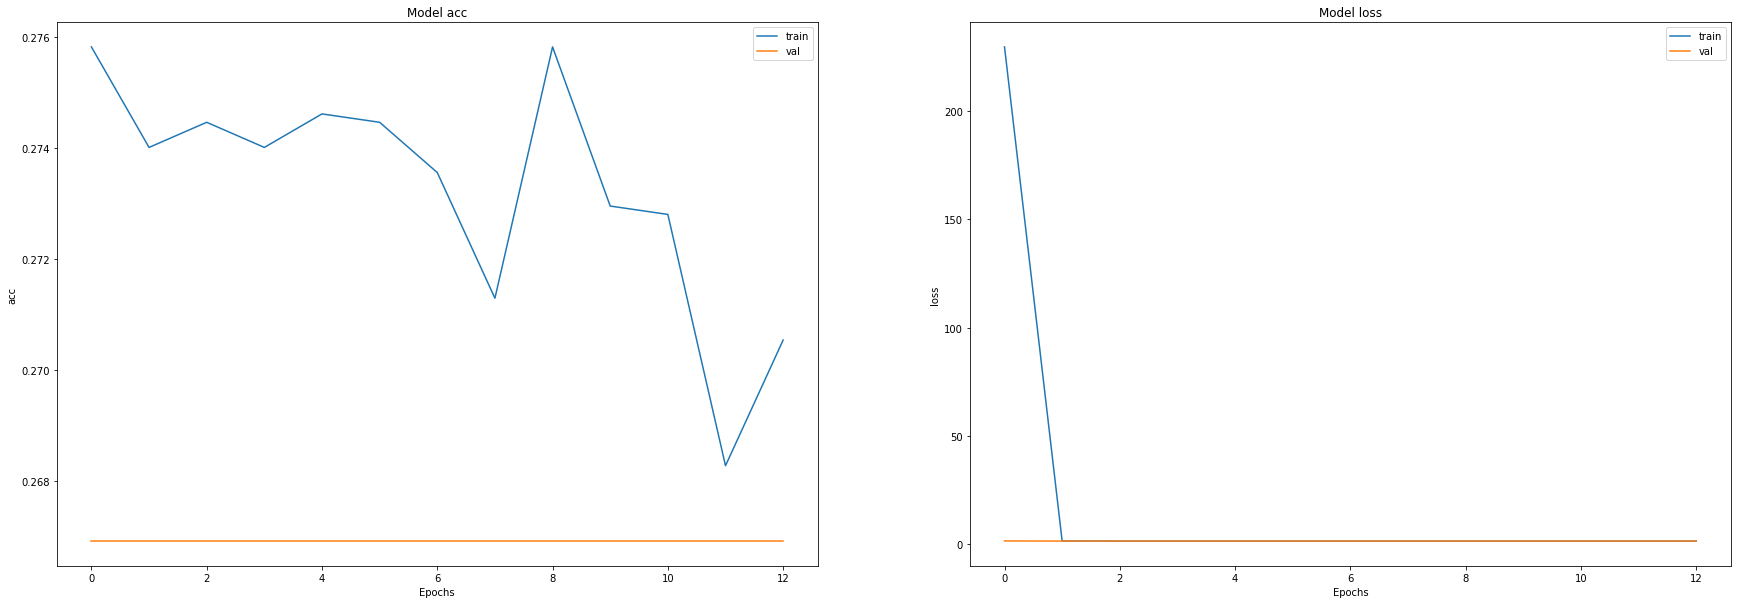

In [9]:
# Imported from visualization_tb

show_accuracy(1, 2, ["acc", "loss"], res_hist)

3. Save the model

In [8]:
model.save("../models/ResNet152v2.h5")

C:\Users\xyang\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


4. Load the saved model 

In [41]:
# Imported from models_tb

new_model = load("../models/ResNet152v2.h5")

5. Predict

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

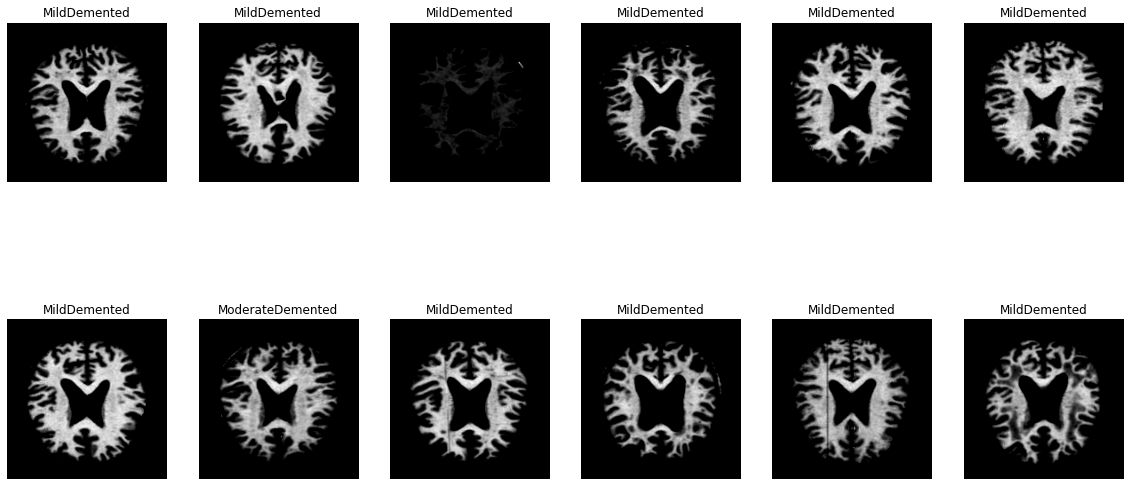

In [42]:
preds = new_model.predict(x_test)

# Imported from visualization_tb.py 

# The images are the x_test set and the tittle of each image the prediction

show_pred(12, 2, 6, x_test, train_ds, preds)

6. Evaluate the model

In [43]:
# Import from folders_tb.py

test_ds = read_folder("training", "test", batch_size=32) 

# Score our model with the test set

evaluate_resnetv2 = new_model.evaluate(test_ds)

Found 1404 files belonging to 4 classes.
Using 1124 files for training.
['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
36/36 [==============================] - 119s 3s/step - loss: 1.3596 - acc: 0.4564


## 5. With Pretrained Network: InceptionV3

1. Define the model

In [7]:
# Imported from models_tb

model = inception("acc")

2. Fit the model

In [8]:
incept_hist = fit(model, train_ds, val_ds, 30)

Epoch 1/30
207/207 [==============================] - 172s 818ms/step - loss: 69.7417 - acc: 0.3905 - val_loss: 1.1226 - val_acc: 0.4632
Epoch 2/30
207/207 [==============================] - 170s 820ms/step - loss: 1.1475 - acc: 0.4586 - val_loss: 1.0654 - val_acc: 0.4861
Epoch 3/30
207/207 [==============================] - 171s 827ms/step - loss: 1.1057 - acc: 0.4710 - val_loss: 1.0463 - val_acc: 0.4952
Epoch 4/30
207/207 [==============================] - 171s 827ms/step - loss: 1.1000 - acc: 0.4688 - val_loss: 1.0166 - val_acc: 0.5115
Epoch 5/30
207/207 [==============================] - 169s 818ms/step - loss: 1.1078 - acc: 0.4565 - val_loss: 1.1090 - val_acc: 0.5175
Epoch 6/30
207/207 [==============================] - 169s 819ms/step - loss: 1.1900 - acc: 0.4047 - val_loss: 1.0266 - val_acc: 0.4511
Epoch 7/30
207/207 [==============================] - 170s 822ms/step - loss: 1.1790 - acc: 0.4019 - val_loss: 1.0198 - val_acc: 0.4746
Epoch 8/30
207/207 [===========================

In [ ]:
# Imported from visualization_tb

show_accuracy(1, 2, ["acc", "loss"], incept_hist)

3. Save the model

In [9]:
model.save("../models/InceptionV3.h5")

4. Load the saved model

In [50]:
new_model = load("../models/InceptionV3.h5")

5. Evaluate the model

In [51]:
# Import from folders_tb.py

test_ds = read_folder("training", "test", batch_size=32) 

# Score our model with the test set

evaluate_inception = new_model.evaluate(test_ds)

Found 1404 files belonging to 4 classes.
Using 1124 files for training.
['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
36/36 [==============================] - 25s 672ms/step - loss: 1.3567 - acc: 0.4564


6. Predict

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

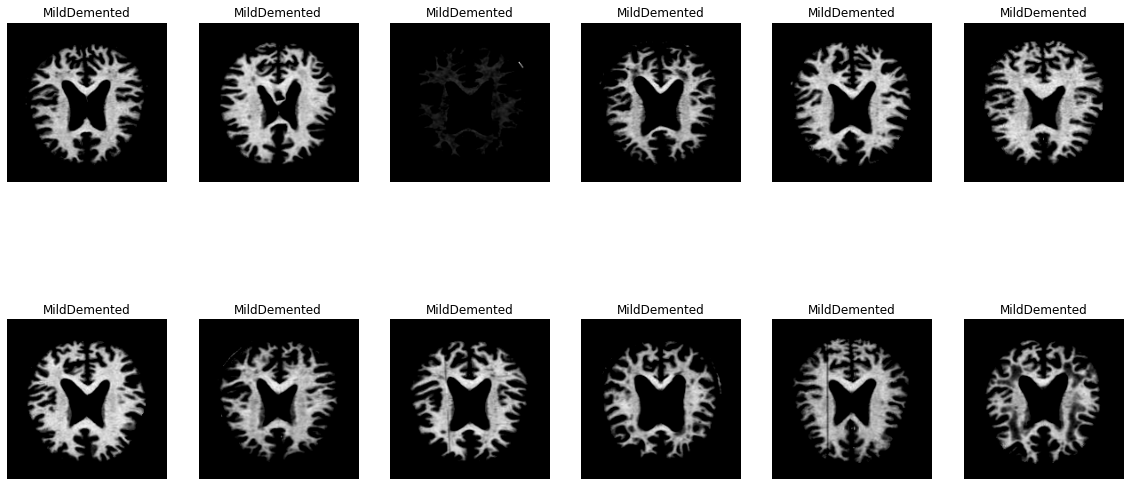

In [13]:
preds = new_model.predict(x_test)

# Imported from visualization_tb.py 

# The images are the x_test set and the tittle of each image the prediction

show_pred(12, 2, 6, x_test, train_ds, preds)

## SVC

1. Create all the dataframe

In [44]:
# Imported from create_df.py

mild = img_array(0, "test", "MildDemented")
moderate = img_array(1, "test", "ModerateDemented")
non_demented = img_array(2, "test", "NonDemented")
very_mild = img_array(3, "test", "VeryMildDemented")

In [45]:
len_mild = len(mild)
print("len mild:", len_mild)
len_moderate = len(moderate)
print("len moderate:", len_moderate)
len_non_demented = len(non_demented)
print("len non demented: ", len_non_demented)
len_very_mild = len(very_mild)
print("len very mild: ", len_very_mild)
suma = len_mild + len_moderate + len_non_demented + len_very_mild
print("total:", suma)

len mild: 304
len moderate: 12
len non demented:  640
len very mild:  448
total: 1404


2. Concatenate all in one dataframe and concat with the first dataframe

In [46]:
# Imported from create_df.py

# Concat all the Dataframes in one

df_test = concat(mild, moderate, non_demented, very_mild)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1404 entries, 0 to 447
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Image     1404 non-null   object
 1   Label     1404 non-null   int64 
 2   Fullpath  1404 non-null   object
 3   Folder    1404 non-null   object
 4   Size      1404 non-null   object
dtypes: int64(1), object(4)
memory usage: 65.8+ KB


In [13]:
full_df = pd.concat([df, df_test])

3. Define X, y, X_train, y_train, X_test, y_test

In [14]:
X = full_df["Image"]
y = full_df["Label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=235) 

4. Define the model and fit it

In [28]:
X_train = np.array(X_train).reshape(-1, 1)
X_train.shape

(7747, 1)

In [ ]:
# Imported from models_tb

clf = svc(X_train, y_train)

5. Save the model

In [ ]:
pickle.dump(clf, open("../models/svc.sav"))

6. Predict 

In [ ]:
y_pred = clf.predict(X_test)
print("y_pred:", y_pred)
print("y_test:", y_test)

7. Score the models

In [ ]:
print ('score:', clf.score(X_train, y_train))
score_svc = clf.score(X_test, y_test)
print ('score:', score_svc )

## RANDOM FOREST

1. Define and fit the model

In [ ]:
rand_f = random_forest(X_train.reshape(-1, 1), y_train)

2. Save the model

In [ ]:
pickle.dump(rand_f, open("../models/RandomForest.sav"))

3. Predict

In [ ]:
y_pred = rand_f.predict(X_test)
print("y_pred:", y_pred)
print("y_test:", y_test)

4. Score the model

In [ ]:
print ('score:', clf.score(X_train, y_train))
score_rand_forest = rand_f.score(X_test, y_test)
print ('score:', score_rand_forest )

## DATAFRAME WITH THE 5 MODELS

In [47]:
par_cnn = ["keras.layers.Conv2D(filters=128)", 
                            "kernel_size=(3, 3)", 
                            "input_shape=(180, 180, 3)", 
                            "padding='valid')",
        "keras.layers.MaxPooling2D(pool_size=(2, 2), padding='valid')",
        "keras.layers.Dropout(0.5)",
        "keras.layers.Conv2D(64, (3, 3), padding='same')", 
        "keras.layers.MaxPooling2D((2, 2), padding='same')",
        "keras.layers.Dropout(0.5)",
        "keras.layers.Flatten()",
        "keras.layers.Dense(128, activation='relu')", 
        "keras.layers.Dense(64, activation='relu')",
        'keras.layers.Dense(4, activation="softmax")']

par_vgg16 =  [['input_shape = (180, 180, 3)',
                  'include_top=False',
                "weights = 'imagenet'"], ['layers.Flatten()(base_model.output)',
                "layers.Dense(512, activation='relu')(x)",
                'layers.Dropout(0.25)(x)',
                "layers.Dense(4, activation='softmax')(x)"], ["optimizer = 'adam'", 
                "loss = 'sparse_categorical_crossentropy'",'metrics = ["acc"]']]

par_resnet = [['input_shape = (180, 180, 3)',
                  'include_top=False',
                "weights = 'imagenet'"], ['layers.Flatten()(base_model.output)',
                "layers.Dense(128, activation='relu')(x)",
                'layers.Dropout(0.25)(x)',
                "layers.Dense(4, activation='softmax')(x)"], ["optimizer = 'adam'", 
                "loss = 'sparse_categorical_crossentropy'",'metrics = ["acc"]']]

par_resnetv2 = [['input_shape = (180, 180, 3)',
                  'include_top=False',
                "weights = 'imagenet'"], ['layers.Flatten()(base_model.output)',
                "layers.Dense(128, activation='relu')(x)",
                'layers.Dropout(0.25)(x)',
                "layers.Dense(4, activation='softmax')(x)"], ["optimizer = 'adam'", 
                "loss = 'sparse_categorical_crossentropy'",'metrics = ["acc"]']]

par_inception = [['input_shape = (180, 180, 3)',
                  'include_top=False',
                "weights = 'imagenet'"], ['layers.Flatten()(base_model.output)',
                "layers.Dense(256, activation='relu')(x)",
                'layers.Dropout(0.25)(x)',
                "layers.Dense(4, activation='softmax')(x)"], ["optimizer = 'adam'", 
                "loss = 'sparse_categorical_crossentropy'",'metrics = ["acc"]']]


In [52]:
five_models = pd.DataFrame({"Model": ["CNN", "VGG16", "ResNet50V2", "ResNet152v2", "InceptionV3"],
                            "Parameters": [par_cnn, par_vgg16, par_resnet, par_resnetv2, par_inception],
                            "Scores": [evaluate, evaluate_vgg16, evaluate_resnet, evaluate_resnetv2, evaluate_inception]})

In [55]:
five_models.to_csv("../resources/five_models.csv", index=False)

# CONCLUSIONS

#### What can you conclude about your data study?

Our dataset is not maybe the best dataset to this classification. The model with the best accuracy has been a CNN pretrained netrwork: VGG16. 

### What would you change if you needed to do another DS project?

I would choose an ordered dataset.

### What do you learn doing this project?

(I learnt that I have to buy a better computer)

Doing this project I have learnt a lot of concepts about Machine Learning and Deep Learning, how to use them and when use them. 

## TIME SPENT IN EACH SECTION

In [30]:
data_searching = 20
data_mining = 40
flask = 5
streamlit = 15
documentation = 20

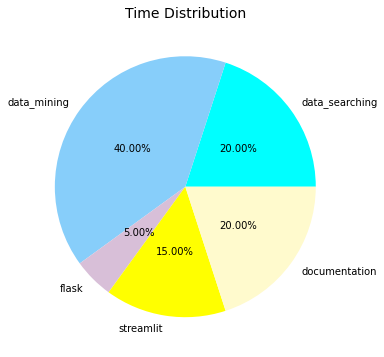

In [31]:
time(data_searching, data_mining,flask, streamlit, documentation, "Time Distribution")